In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
import warnings
warnings.filterwarnings('ignore')

Two functions are defined to box plot, one for rho component and other one is for the rest of it.

usage for rho:
```Python
plot_rho(df_rho_s, cell_type)
````

usage for other components:
```Python
plot_components("T:CALM2_HSPC:PDE1B",dataframe, "y_axis_label")
```

In [3]:
input_dir = "each_component_values/"

In [4]:
df_a_s   = pd.read_csv(input_dir + "interactions_a_s.csv", index_col=0)
df_a_r   = pd.read_csv(input_dir + "interactions_a_r.csv", index_col=0)
df_e_s_l = pd.read_csv(input_dir + "interactions_e_s_l.csv", index_col=0)
df_e_r_r = pd.read_csv(input_dir + "interactions_e_r_r.csv", index_col=0)
df_rho_s = pd.read_csv(input_dir + "interactions_rho_s.csv", index_col=0)
df_rho_r = pd.read_csv(input_dir + "interactions_rho_r.csv", index_col=0)

df_phi_r_r =  pd.read_csv(input_dir + "interactions_phi_r_r.csv", index_col=0)
df_phi_s_l =  pd.read_csv(input_dir + "interactions_phi_s_l.csv", index_col=0)

df_p_r_r = pd.read_csv(input_dir + "interactions_p_r_r.csv", index_col=0)
df_p_s_l = pd.read_csv(input_dir + "interactions_p_s_l.csv", index_col=0)
df_weights = pd.read_csv(input_dir + "interactions_weights.csv", index_col=0)

In [5]:
def plot_rho(df, cell_type):
    int_id = df.index[df.index.str.startswith(cell_type)].tolist()[0]
    subset_df = df_rho_s.loc[df_rho_s.index == int_id].T
    subset_df.columns = ["Value"]
    subset_df["Condition"] = ["healthy" if "healthy" in index else "AML" for index in subset_df.index]
    group1 = subset_df[subset_df['Condition'] == 'healthy']['Value']
    group2 = subset_df[subset_df['Condition'] == 'AML']['Value']
    t_stat, p_value = ttest_ind(group1, group2)
    
    condition_order = ["healthy", "AML"]
    
    sns.boxplot(x='Condition', y='Value', data=subset_df, palette={"healthy": "#7AC5CD", "AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order=condition_order)
    sns.swarmplot(x='Condition', y='Value', data=subset_df, color='.25', size=14, order=condition_order)
    
    plt.title(f"Cell Type: {cell_type}")
    
    # Calculate the position for the p-value text
    x_position = 0.5  # Center of the x-axis
    y_position = subset_df['Value'].max() * 1.2  # A bit above the maximum value in the plot
    
    # Add the p-value text to the plot
    plt.text(x_position, y_position, f"p-value = {p_value:.4f}", ha='center')

    
    plt.show()

In [6]:
def plot_components(interaction_name_variable,df_x, y_label):
    
    # Split into sender and receiver parts
    sender_info, receiver_info = interaction_name_variable.split('_')
    sender, sender_ligand = sender_info.split(':')
    receiver, receiver_receptor = receiver_info.split(':')
    
    
    # Labels dictionary for the plot titles
    labels_dict = {

        'sender_celltype': f"{sender}",
        'receiver_celltype': f"{receiver}",
        'sender_component': f"{sender}: {sender_ligand}",
        'receiver_component': f"{sender}: {receiver_receptor}",
    }
    
    # New dictionary for the y-axis labels
    y_label = y_label


    subset_df = df_x.loc[df_x.index == interaction_name_variable].T
    subset_df.columns = ["Value"]
    
    subset_df["Condition"] = ["healthy" if "healthy" in index else "AML" for index in subset_df.index]
    
    group1 = subset_df[subset_df['Condition'] == 'healthy']['Value']
    group2 = subset_df[subset_df['Condition'] == 'AML']['Value']
    t_stat, p_value = ttest_ind(group1, group2)
    
    condition_order = ["healthy", "AML"]
    
    sns.boxplot(x='Condition', y='Value', data=subset_df, palette={ "healthy": "#7AC5CD","AML": "#7C001F"}, boxprops=dict(alpha=0.70), showfliers=False, order = condition_order)
    sns.swarmplot(x='Condition', y='Value', data=subset_df, color='.25', size=14, order = condition_order)

    # Setting the y-axis label
    plt.ylabel(y_label)
    
        # Calculate the position for the p-value text
    x_position = 0.5  # Center of the x-axis
    y_position = subset_df['Value'].max() * 1.1  # A bit above the maximum value in the plot
    
    # Add the p-value text to the plot
    plt.text(x_position, y_position, f"p-value = {p_value:.4f}", ha='center')


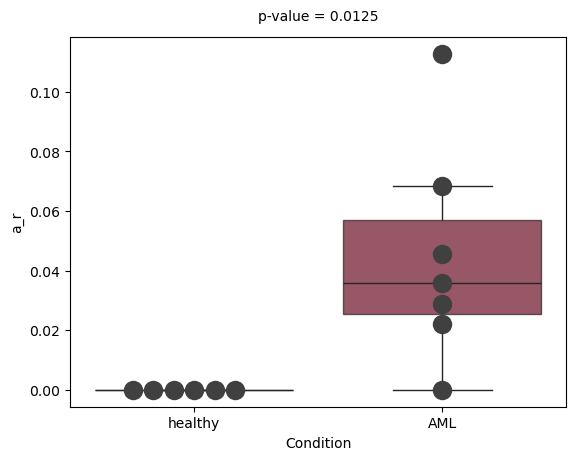

In [7]:
plot_components("T:CALM2_HSPC:PDE1B",df_a_r,"a_r")

In [8]:
df_a_r[df_a_r.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.0,0.021944,0.028958,0.112676,0.068528,0.036,0.045455,0.0,0.0,0.0,0.0,0.0,0.0


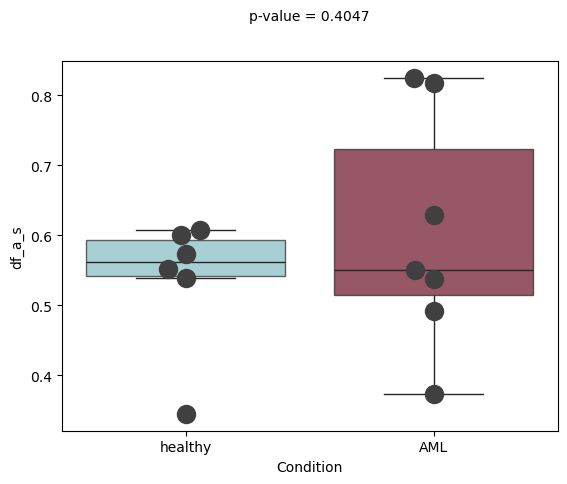

In [9]:
plot_components("T:CALM2_HSPC:PDE1B",df_a_s,"df_a_s")

In [10]:
df_a_s[df_a_s.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.492308,0.62963,0.373333,0.824655,0.549801,0.53742,0.816984,0.551724,0.573099,0.6,0.607858,0.538425,0.34507


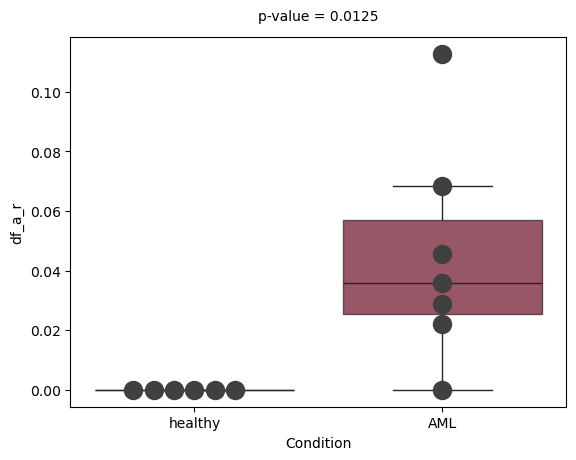

In [11]:
plot_components("T:CALM2_HSPC:PDE1B",df_a_r,"df_a_r")

In [12]:
df_a_r[df_a_r.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.0,0.021944,0.028958,0.112676,0.068528,0.036,0.045455,0.0,0.0,0.0,0.0,0.0,0.0


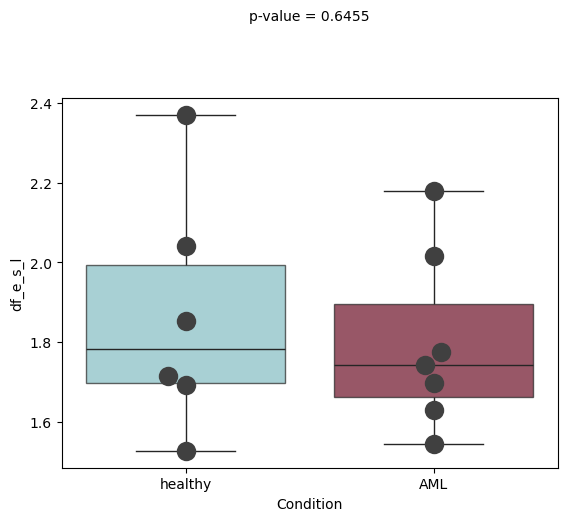

In [13]:
plot_components("T:CALM2_HSPC:PDE1B",df_e_s_l,"df_e_s_l")

In [14]:
df_e_s_l[df_e_s_l.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,2.015809,1.775101,2.18017,1.698294,1.629327,1.743068,1.544445,1.527729,1.692702,1.852347,1.71644,2.041715,2.369894


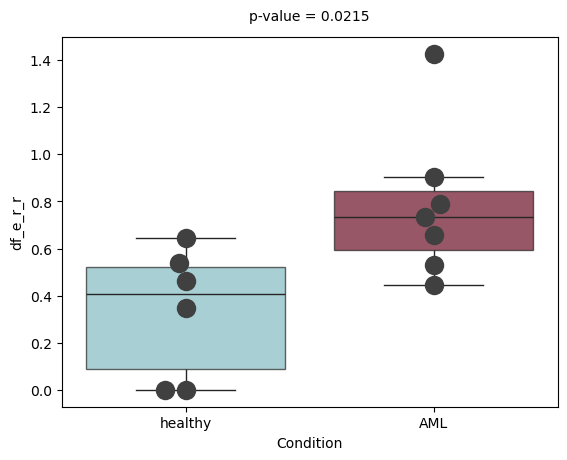

In [15]:
plot_components("T:CALM2_HSPC:PDE1B",df_e_r_r,"df_e_r_r")

In [16]:
df_e_r_r[df_e_r_r.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.44487,0.657042,0.902085,1.425957,0.788383,0.731962,0.529613,0.645383,0.540764,0.347353,0.0,0.462674,0.0


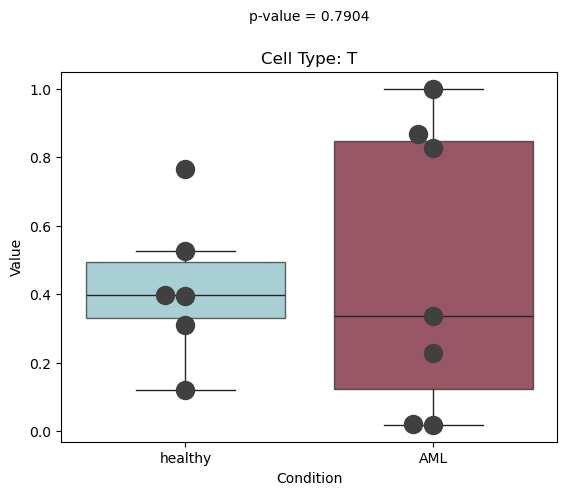

In [17]:
plot_rho(df_rho_s,"T")

In [18]:
df_rho_s[df_rho_s.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.017937,0.021243,0.226913,1.0,0.335478,0.867479,0.828694,0.398211,0.120516,0.76581,0.396137,0.525448,0.30987


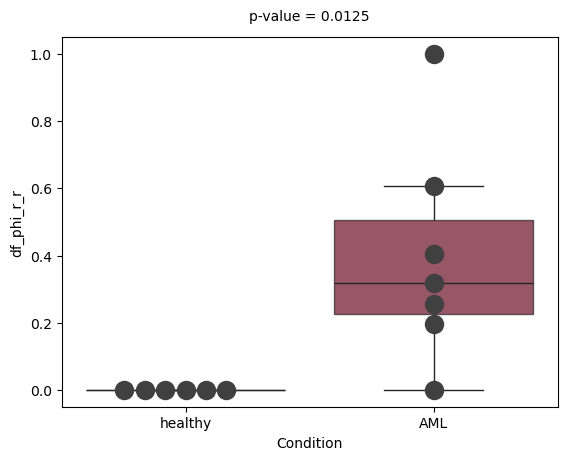

In [19]:
plot_components("T:CALM2_HSPC:PDE1B",df_phi_r_r,"df_phi_r_r")

In [20]:
df_phi_r_r[df_phi_r_r.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.0,0.194749,0.256998,1.0,0.608185,0.3195,0.403409,0.0,0.0,0.0,0.0,0.0,0.0


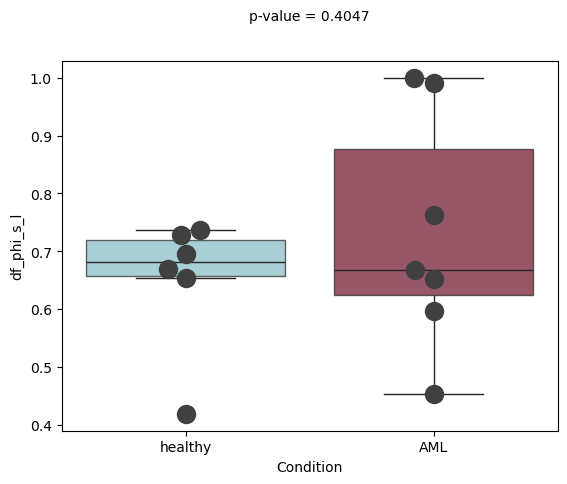

In [21]:
plot_components("T:CALM2_HSPC:PDE1B",df_phi_s_l,"df_phi_s_l")

In [22]:
df_phi_s_l[df_phi_s_l.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.596987,0.763507,0.452715,1.0,0.666704,0.651691,0.990698,0.669037,0.694957,0.727577,0.737106,0.65291,0.418442


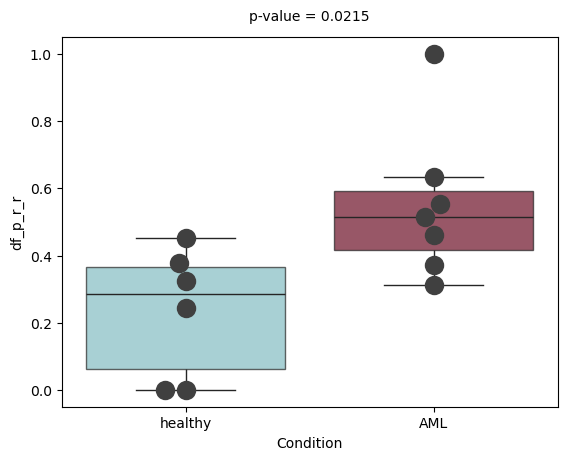

In [23]:
plot_components("T:CALM2_HSPC:PDE1B",df_p_r_r,"df_p_r_r")

In [24]:
df_p_r_r[df_p_r_r.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.31198,0.460773,0.632617,1.0,0.55288,0.513313,0.371409,0.452597,0.379229,0.243593,0.0,0.324466,0.0


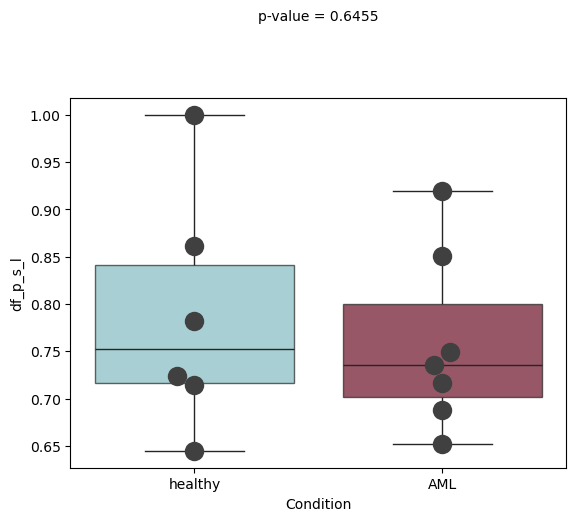

In [25]:
plot_components("T:CALM2_HSPC:PDE1B",df_p_s_l,"df_p_s_l")

In [26]:
df_p_s_l[df_p_s_l.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.85059,0.749021,0.919944,0.716612,0.68751,0.735505,0.651694,0.64464,0.714252,0.781616,0.724269,0.861522,1.0


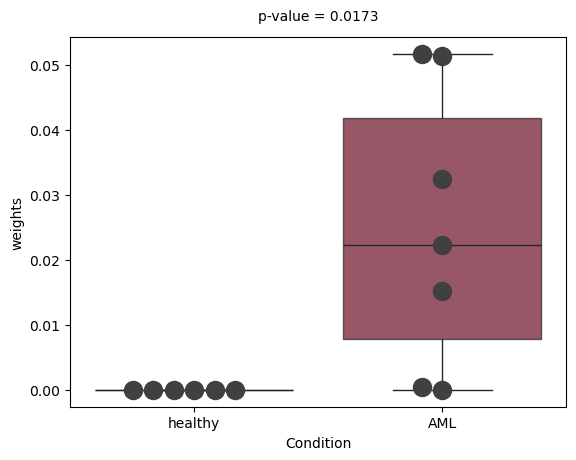

In [27]:
plot_components("T:CALM2_HSPC:PDE1B",df_weights,"weights")

In [28]:
df_weights[df_weights.index=="T:CALM2_HSPC:PDE1B"]

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
T:CALM2_HSPC:PDE1B,0.0,0.00052,0.015242,0.051338,0.051706,0.022359,0.032507,0.0,0.0,0.0,0.0,0.0,0.0
